Found 7324 images belonging to 2 classes.
Found 2357 images belonging to 2 classes.
Found 1042 images belonging to 2 classes.


C:\Users\Moyamoy\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C:\Users\Moyamoy\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
229/229 ━━━━━━━━━━━━━━━━━━━━ 345s 1s/step - accuracy: 0.6379 - loss: 0.7259 - val_accuracy: 0.7955 - val_loss: 0.4549
Epoch 2/20
229/229 ━━━━━━━━━━━━━━━━━━━━ 128s 559ms/step - accuracy: 0.7384 - loss: 0.5481 - val_accuracy: 0.8036 - val_loss: 0.4623
Epoch 3/20
229/229 ━━━━━━━━━━━━━━━━━━━━ 126s 549ms/step - accuracy: 0.7527 - loss: 0.5158 - val_accuracy: 0.7395 - val_loss: 0.5711
Epoch 4/20
229/229 ━━━━━━━━━━━━━━━━━━━━ 127s 552ms/step - accuracy: 0.7500 - loss: 0.5199 - val_accuracy: 0.8210 - val_loss: 0.4374
Epoch 5/20
229/229 ━━━━━━━━━━━━━━━━━━━━ 127s 554ms/step - accuracy: 0.7712 - loss: 0.4907 - val_accuracy: 0.8210 - val_loss: 0.4279
Epoch 6/20
229/229 ━━━━━━━━━━━━━━━━━━━━ 127s 554ms/step - accuracy: 0.7607 - loss: 0.4938 - val_accuracy: 0.8091 - val_loss: 0.4574
Epoch 7/20
229/229 ━━━━━━━━━━━━━━━━━━━━ 127s 553ms/step - accuracy: 0.7645 - loss: 0.4849 - val_accuracy: 0.8328 - val_loss: 0.3901
Epoch 8/20
229/229 ━━━━━━━━━━━━━━━━━━━━ 126s 551ms/step - accuracy: 0.7688 - lo

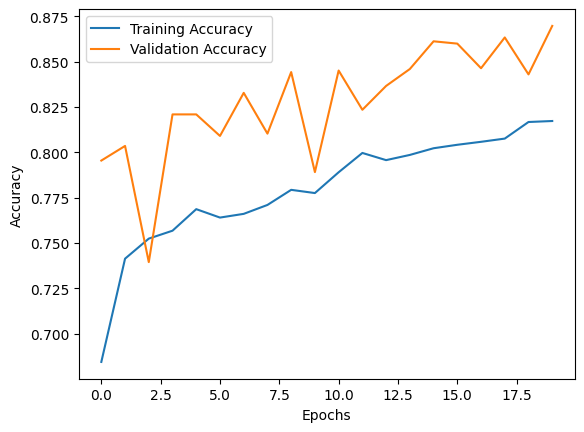

In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import os

# Define dataset path
data_dir = r"C:\Users\Moyamoy\Desktop\MachineLEarning\GARBAGE CLASSIFICATION"
train_dir = os.path.join(data_dir, 'train')
valid_dir = os.path.join(data_dir, 'valid')
test_dir = os.path.join(data_dir, 'test')

# Image data generators with augmentation for training
data_gen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

# No augmentation for validation and testing
valid_test_gen = ImageDataGenerator(rescale=1./255)

# Load images from directory
train_data = data_gen.flow_from_directory(
    train_dir, target_size=(150, 150), batch_size=32, class_mode='binary'
)
valid_data = valid_test_gen.flow_from_directory(
    valid_dir, target_size=(150, 150), batch_size=32, class_mode='binary'
)
test_data = valid_test_gen.flow_from_directory(
    test_dir, target_size=(150, 150), batch_size=32, class_mode='binary', shuffle=False
)

# Build CNN model
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    train_data,
    validation_data=valid_data,
    epochs=20
)

# Evaluate model on test data
test_loss, test_acc = model.evaluate(test_data)
print(f"Test Accuracy: {test_acc * 100:.2f}%")

# Plot training history
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Save the trained model
model.save("waste_classifier_model.h5")


In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

# Set dataset paths
train_dir = r'C:\Users\Moyamoy\Desktop\MachineLEarning\GARBAGE CLASSIFICATION\train'
valid_dir = r'C:\Users\Moyamoy\Desktop\MachineLEarning\GARBAGE CLASSIFICATION\valid'
test_dir = r'C:\Users\Moyamoy\Desktop\MachineLEarning\GARBAGE CLASSIFICATION\test'

# Data Augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

valid_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Load images
train_data = train_datagen.flow_from_directory(
    train_dir, target_size=(150, 150), batch_size=32, class_mode='binary'
)
valid_data = valid_datagen.flow_from_directory(
    valid_dir, target_size=(150, 150), batch_size=32, class_mode='binary'
)
test_data = test_datagen.flow_from_directory(
    test_dir, target_size=(150, 150), batch_size=32, class_mode='binary', shuffle=False
)

# CNN Model
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)),
    MaxPooling2D(2,2),
    
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),  # Dropout to prevent overfitting
    Dense(1, activation='sigmoid')
])

# Compile Model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Callbacks
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1)
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True, verbose=1)

# Train Model
history = model.fit(
    train_data,
    validation_data=valid_data,
    epochs=30,  # Increased epochs for better learning
    callbacks=[lr_scheduler, early_stopping]
)

# Evaluate on Test Data
test_loss, test_acc = model.evaluate(test_data)
print(f"Test Accuracy: {test_acc * 100:.2f}%")

# Save Model
model.save("waste_classifier_modelv2.h5")


Found 7324 images belonging to 2 classes.
Found 2357 images belonging to 2 classes.
Found 1042 images belonging to 2 classes.
Epoch 1/30
229/229 ━━━━━━━━━━━━━━━━━━━━ 216s 934ms/step - accuracy: 0.6504 - loss: 0.6744 - val_accuracy: 0.7395 - val_loss: 0.5893 - learning_rate: 5.0000e-04
Epoch 2/30
229/229 ━━━━━━━━━━━━━━━━━━━━ 127s 553ms/step - accuracy: 0.7425 - loss: 0.5211 - val_accuracy: 0.8087 - val_loss: 0.4438 - learning_rate: 5.0000e-04
Epoch 3/30
229/229 ━━━━━━━━━━━━━━━━━━━━ 126s 552ms/step - accuracy: 0.7536 - loss: 0.5016 - val_accuracy: 0.7798 - val_loss: 0.5026 - learning_rate: 5.0000e-04
Epoch 4/30
229/229 ━━━━━━━━━━━━━━━━━━━━ 125s 543ms/step - accuracy: 0.7572 - loss: 0.5063 - val_accuracy: 0.7917 - val_loss: 0.4789 - learning_rate: 5.0000e-04
Epoch 5/30
229/229 ━━━━━━━━━━━━━━━━━━━━ 132s 576ms/step - accuracy: 0.7626 - loss: 0.4894 - val_accuracy: 0.8333 - val_loss: 0.4028 - learning_rate: 5.0000e-04
Epoch 6/30
229/229 ━━━━━━━━━━━━━━━━━━━━ 127s 553ms/step - accuracy: 0.7696

Test Accuracy: 68.23%


In [3]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

# Paths
train_dir = r'C:\Users\Moyamoy\Desktop\MachineLEarning\GARBAGE CLASSIFICATION\train'
valid_dir = r'C:\Users\Moyamoy\Desktop\MachineLEarning\GARBAGE CLASSIFICATION\valid'
test_dir = r'C:\Users\Moyamoy\Desktop\MachineLEarning\GARBAGE CLASSIFICATION\test'

# Data Augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.3,
    height_shift_range=0.3,
    shear_range=0.3,
    zoom_range=0.3,
    brightness_range=[0.5, 1.5],
    horizontal_flip=True,
    fill_mode='nearest'
)

valid_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Load images
train_data = train_datagen.flow_from_directory(
    train_dir, target_size=(224, 224), batch_size=32, class_mode='binary'
)
valid_data = valid_datagen.flow_from_directory(
    valid_dir, target_size=(224, 224), batch_size=32, class_mode='binary'
)
test_data = test_datagen.flow_from_directory(
    test_dir, target_size=(224, 224), batch_size=32, class_mode='binary', shuffle=False
)

# Load Pretrained Model (MobileNetV2)
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False  # Freeze base model

# Custom Model
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Compile Model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0003),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Callbacks
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1)
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True, verbose=1)

# Train Model
history = model.fit(
    train_data,
    validation_data=valid_data,
    epochs=30,
    callbacks=[lr_scheduler, early_stopping]
)

# Evaluate on Test Data
test_loss, test_acc = model.evaluate(test_data)
print(f"Test Accuracy: {test_acc * 100:.2f}%")

# Save Model
model.save("waste_classifier_mobilenet.h5")


Found 7324 images belonging to 2 classes.
Found 2357 images belonging to 2 classes.
Found 1042 images belonging to 2 classes.
9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Epoch 1/30
229/229 ━━━━━━━━━━━━━━━━━━━━ 229s 968ms/step - accuracy: 0.8110 - loss: 0.4133 - val_accuracy: 0.9376 - val_loss: 0.1605 - learning_rate: 3.0000e-04
Epoch 2/30
229/229 ━━━━━━━━━━━━━━━━━━━━ 219s 957ms/step - accuracy: 0.8953 - loss: 0.2606 - val_accuracy: 0.9406 - val_loss: 0.1448 - learning_rate: 3.0000e-04
Epoch 3/30
229/229 ━━━━━━━━━━━━━━━━━━━━ 219s 955ms/step - accuracy: 0.9149 - loss: 0.2137 - val_accuracy: 0.9457 - val_loss: 0.1342 - learning_rate: 3.0000e-04
Epoch 4/30
229/229 ━━━━━━━━━━━━━━━━━━━━ 218s 954ms/step - accuracy: 0.9142 - loss: 0.2088 - val_accuracy: 0.9487 - val_loss: 0.1300 - learning_rate: 3.0000e-04
Epoch 5/30
229/229 ━━━━━━━━━━━━━━━━━━━━ 209s 912ms/step - accuracy: 0.9156 - loss: 0.2007 - val_accuracy: 0.9465 - val_loss: 0.1236 - learning_rate: 3.0000e-04
Epoch 6/30
229/229 ━━━━━━

Test Accuracy: 92.80%
